# Pillow

In [1]:
from PIL import Image, ImageFilter, ImageChops

In [30]:
im = Image.open('1479789475176948533.jpg') # laod image

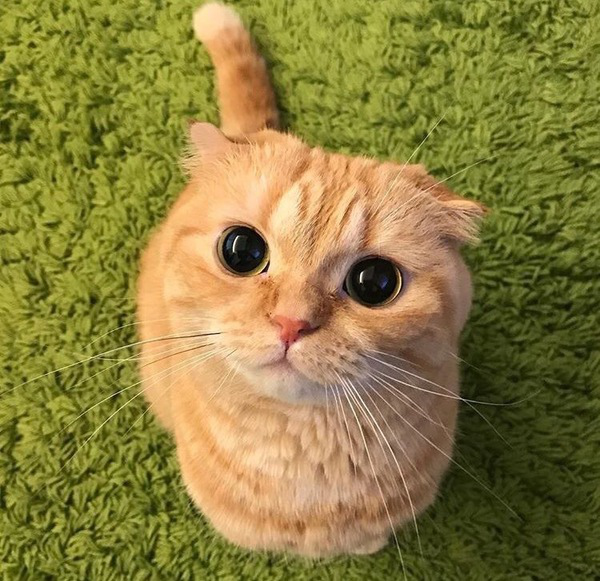

In [3]:
im

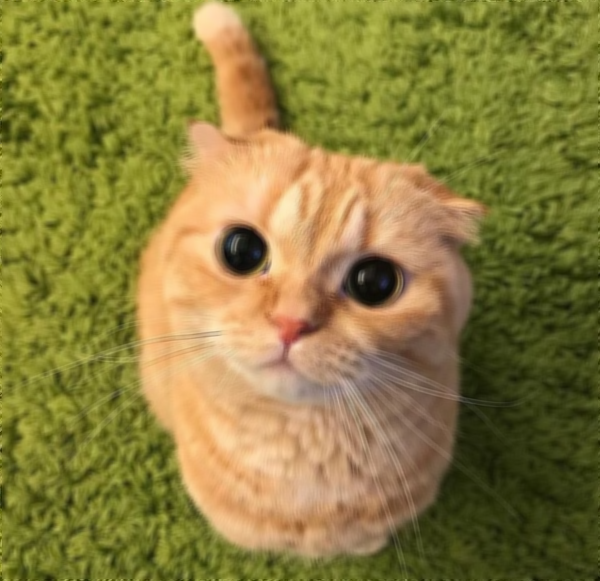

In [4]:
blurred = im.filter(ImageFilter.BLUR) # blur image and save as a new image
blurred
# blurred.save('blurred.png')

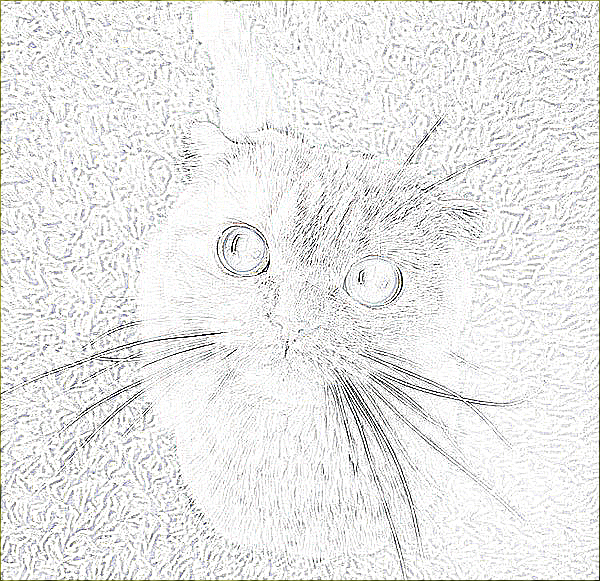

In [5]:
contoured = im.filter(ImageFilter.CONTOUR) # get the contoures of source image and save as a new image
contoured
# contoured.save('contoured.png')

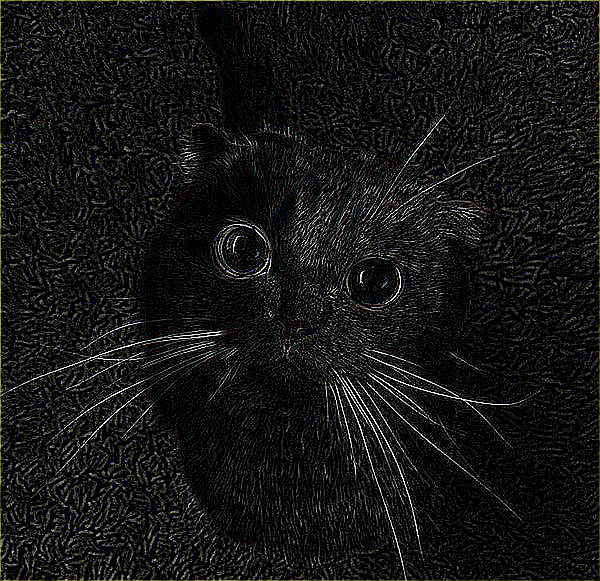

In [6]:
edges = im.filter(ImageFilter.FIND_EDGES) # get the edges of source image and save as a new image
edges
# edges.save('edges.png')

#### Convert to grayscale

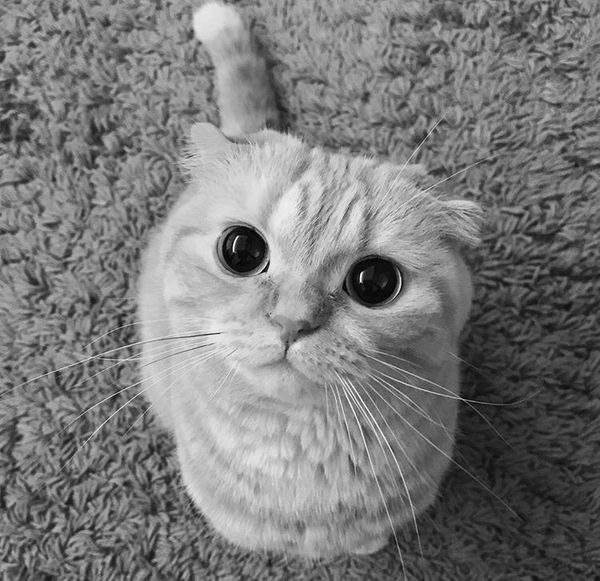

In [38]:
L = im.convert('L')
L

#### Convert to pixel through the palette

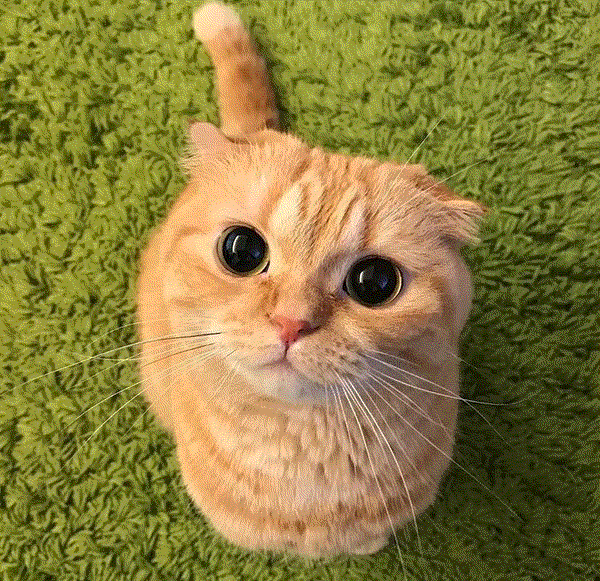

In [36]:
P = im.convert('P')
P

In [11]:
# details = im.filter(ImageFilter.DETAIL) # get the detailed source image and save as a new image
# details
# details.save('details.png')

# OpenCV

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from imutils.perspective import four_point_transform
from imutils import contours
import imutils

def show_image(img_name, img):
    cv2.imshow(img_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Images

### Loading Images

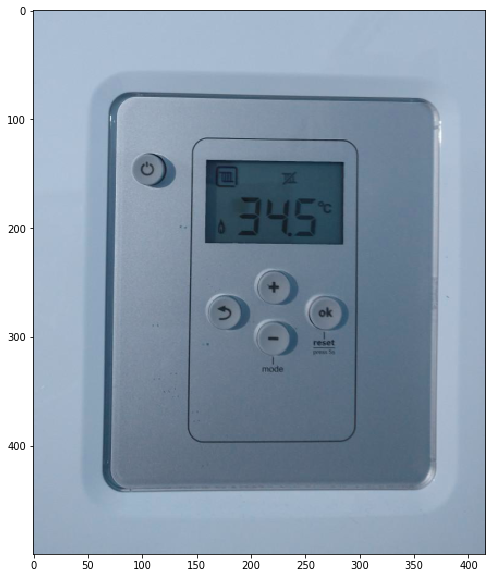

In [2]:
img = cv2.imread('example.jpg') # read image (0 - black and white)

img = imutils.resize(img, height=500)

plt.figure(figsize=(10, 10))
plt.imshow(img)

### Translation

Translation is the shifting is the shifting of an image along the x and y axis.

In [3]:
# [1, 0, tx] - shifting image to the left (negative int) or right (positive ing)
# [0, 1, ty] - shifting image up (negative ing) or down (positive int)
 
M = np.float32([[1, 0, 25], [0, 1, 50]]) # shifting image 25 px right and 50 px down
shifted = cv2.warpAffine(img.copy(), M, (img.shape[1], img.shape[0]))
cv2.imshow("Shifted Down and Right", shifted)

M = np.float32([[1, 0, -50], [0, 1, -90]]) # shifting image 50 px left and 90 px up
shifted = cv2.warpAffine(img.copy(), M, (img.shape[1], img.shape[0]))

show_image("Shifted Up and Left", shifted) # show image

In [6]:
# translation function

def translate(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[1]))
    
    return shifted

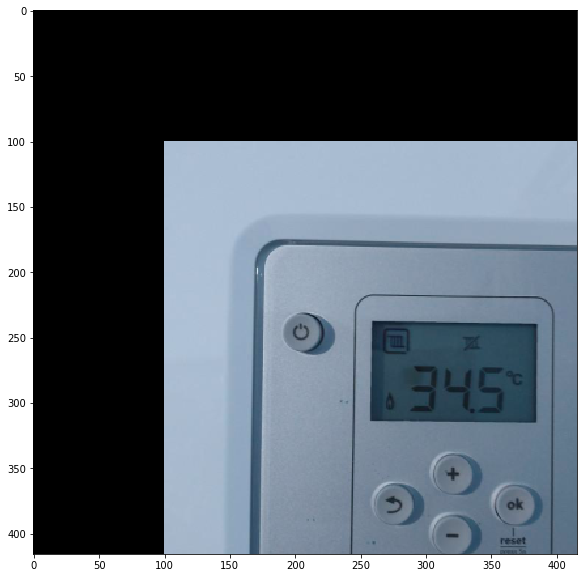

In [8]:
shifted = translate(img, 100, 100)

plt.figure(figsize=(10, 10))
plt.imshow(shifted)

show_image("Shifted", shifted) # show image

### Rotation

In [9]:
# get height and width of image
(h, w) = img.shape[0], img.shape[1]

# get the center of image
center = (h / 2, w / 2)

# define rotation matrix
"""params:  center point; angle; scale"""
M = cv2.getRotationMatrix2D(center, 45, 1.0) # rotate to 45*

rotated = cv2.warpAffine(img.copy(), M, (w, h))

# cv2.imshow("Rotated", rotated) # show image
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [10]:
# rotation function

def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    
    if center is None:
        center = (w / 2, h / 2)
    
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    
    return rotated

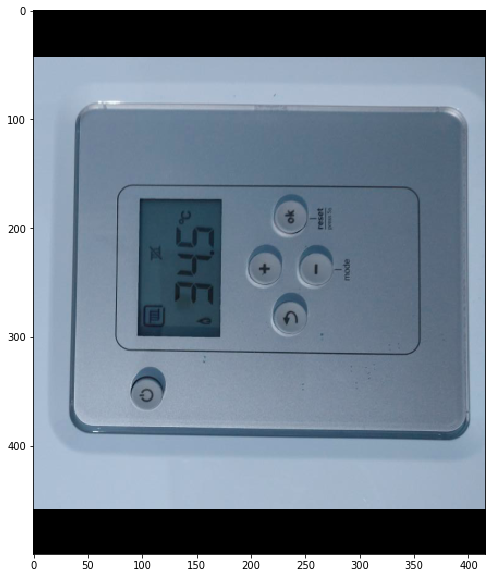

In [11]:
rotated = rotate(img.copy(), 90)

plt.figure(figsize=(10, 10))
plt.imshow(rotated)

# cv2.imshow("Rotated", rotated) # show image
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Resizing

When resizing image we have to keep in mind the aspect ratio of the image.

<p>The aspect ratio is the proportional
relationship of the width and the height of the image.
If we don’t be mindful of the aspect ratio, our resizing will
return results that don’t look correct.</p>

In [12]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2] # get the width and height of image
    
    if width is None and height is None:
        return image
    
    elif width is None: # resize by height
        r = height / float(h) 
        dim = (int(w * r), height)
    
    elif height is None: # resize by width              
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv2.resize(image, dim, interpolation = inter)
    
    return resized

In [13]:
img.shape

(500, 416, 3)

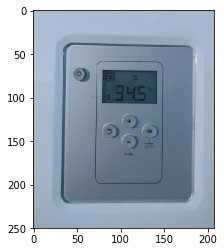

In [14]:
resized = resize(img, height=250)

plt.imshow(resized)
plt.show()

In [15]:
resized.shape

(250, 208, 3)

In [16]:
# cv2.imshow("Resized", reszized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Flipping

In [17]:
flipped = cv2.flip(img.copy(), 0) # 0 - flip vertically

cv2.imshow('Original', img)
cv2.imshow("Flipped Vertically", flipped)

flipped = cv2.flip(img.copy(), 1) # 1 - flip horizontally

cv2.imshow("Flipped Horizontally", flipped)

flipped = cv2.flip(img.copy(), -1) # -1 - flip vertically and horizontally

cv2.imshow("Flipped Vertically and Horizontally", flipped)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Cropping

In [18]:
cropped = img[30:120, 240:335]

cv2.imshow('Cropped', cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Histograms

#### Grayscale Histograms

A histogram represents
the distribution of pixel intensities (whether color or grayscale)
in an image. It can be visualized as a graph (or plot)
that gives a high-level intuition of the intensity (pixel value)
distribution. We are going to assume a RGB color space in
this example, so these pixel values will be in the range of 0
to 255.
<p>When plotting the histogram, the X-axis serves as our
“bins”. If we construct a histogram with 256 bins, then
we are effectively counting the number of times each pixel
value occurs. In contrast, if we use only 2 (equally spaced)
bins, then we are counting the number of times a pixel is in
the range [0, 128) or [128, 255]. The number of pixels binned
to the x-axis value is then plotted on the y-axis.
By simply examining the histogram of an image, you get
a general understanding regarding the contrast, brightness,

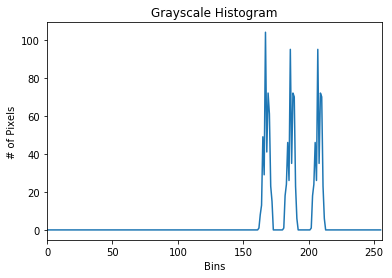

In [18]:
"""
1. images: This is the image that we want to compute a
histogram for. Wrap it as a list: [myImage].

2. channels: A list of indexes, where we specify the index
of the channel we want to compute a histogram
for. To compute a histogram of a grayscale image, the
list would be [0]. To compute a histogram for all
three red, green, and blue channels, the channels list
would be [0,1,2].

3. mask: Remember learning about masks in Chapter
6? Well, here we can supply a mask. If a mask is
provided, a histogram will be computed for masked
pixels only. If we do not have a mask or do not want
to apply one, we can just provide a value of None.

4. histSize: This is the number of bins we want to use
when computing a histogram. Again, this is a list, one
for each channel we are computing a histogram for.
The bin sizes do not all have to be the same. Here is
an example of 32 bins for each channel: [32,32,32].

5. ranges: The range of possible pixel values. Normally,
this is [0, 256] for each channel, but if you are using a
color space other than RGB (such as HSV), the ranges
might be different.
"""
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist(img, [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

show_image('Gray', gray)

#### Color Histograms

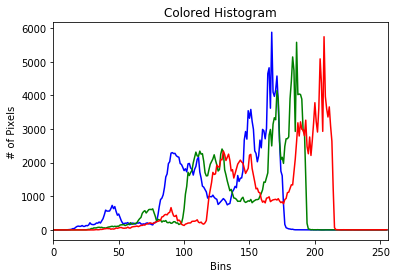

In [19]:
channels = cv2.split(img)

colors = ('b', 'g', 'r')

plt.figure()
plt.title('Colored Histogram')
plt.xlabel('Bins')
plt.ylabel("# of Pixels")
plt.xlim([0, 256])

for (chan, color) in zip(channels, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.show()
    
show_image('Original', img)

#### Histogram Equalization

Histogram equalization improves the contrast of an image
by “stretching” the distribution of pixels. Consider a histogram
with a large peak at the center of it. Applying histogram
equalization will stretch the peak out towards the
corner of the image, thus improving the global contrast of
the image. Histogram equalization is applied to grayscale
images.
<p>This method is useful when an image contains foregrounds
and backgrounds that are both dark or both light. It
tends to produce unrealistic effects in photographs; however,
is normally useful when enhancing the contrast of
medical or satellite images.

In [20]:
eq = cv2.equalizeHist(gray)

show_image('Histogram Equalization', np.hstack([gray, eq]))

### Bluring & Making Gray

#### Averaging Blur

In [21]:
average_blur = np.hstack([
    img,
    cv2.blur(img, (3, 3)),
    cv2.blur(img, (5, 5)),
    cv2.blur(img, (7, 7)),
])

show_image('Average Blur', average_blur)

#### Median Blur

In [22]:
median_blur = np.hstack([
    img,
    cv2.medianBlur(img, 3),
    cv2.medianBlur(img, 5),
    cv2.medianBlur(img, 7)])

show_image('Median Blur', median_blur)

#### Gaussian Blur

In [23]:
gaussian_blur = np.hstack([
    img,
    cv2.GaussianBlur(img, (3, 3), 0),
    cv2.GaussianBlur(img, (5, 5), 0),
    cv2.GaussianBlur(img, (7, 7), 0),
])

show_image('Gaussian Blur', gaussian_blur)

#### Bilateral Blur

In order to reduce noise while still maintaining edges, we can use bilateral blurring. Bilateral blurring accomplishes this by introducing two Gaussian distributions.

<p> Overall, this method is able to preserve edges of an im- age, while still reducing noise. The largest downside to this method is that it is considerably slower than it’s averaging, Gaussian, and median blurring counterparts.

The first parameter we supply is the image we want to blur. Then, we need to define the diameter of our pixel neighborhood. The third argument is our color σ. A larger value for color σ means that more colors in the neighborhood will be considered when com- puting the blur. Finally, we need to supply the space σ. A larger value of space σ means that pixels farther out from the central pixel will influence the blurring calculation, pro- vided that their colors are similar enough.

In [24]:
"""
params:

1. src: image we want to blur
2. d: diameter of pixel neighborhood
3. sigmaColor: color σ
4. sigmaSpace: space σ
"""

bilateral_blur = np.hstack([
    img,
    cv2.bilateralFilter(img, 5, 21, 21),
    cv2.bilateralFilter(img, 7, 31, 31),
    cv2.bilateralFilter(img, 9, 41, 41)
])

show_image('Bilateral Blur', bilateral_blur)

### Thresholding

Thresholding is the binarization of an image. In general, we seek to convert a grayscale image to a binary image, where the pixels are either 0 or 255.
<p>A simple thresholding example would be selecting a pixel value p, and then setting all pixel intensities less than p to zero, and all pixel values greater than p to 255. In this way, we are able to create a binary representation of the image.
<p>Normally, we use thresholding to focus on objects or ar- eas of particular interest in an image. In the examples in the sections below, we will empty out our pockets and look at our spare change. Using thresholding methods, we’ll be able to find the coins in an image.

<i>Algorithm:
1. Grascale an image;
2. Blur the image;
3. Apply thresholding.</i>

#### Simple Thresholding

After the image is blurred, we compute the thresholded
image on Line 14 using the cv2.threshold function. This method requires four arguments. The first is the grayscale image that we wish to threshold. We supply our blurred image here.
<p>Then, we manually supply our T threshold value. We use a value of T = 155.
Our third argument is our maximum value applied during thresholding. Any pixel intensity p that is greater than T, is set to this value. In our example, any pixel value that is greater than 155 is set to 255. Any value that is less than 155 is set to zero.
<p>Finally, we must provide a thresholding method. We use the cv2.THRESH_BINARY method, which indicates that pixel values p greater than T are set to the maximum value (the third argument).

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

"""
params:

1. src: grayscale image we wish to threshold

2. thresh: T threshold value

3. maxval: Maximum value applied during threshholding

4. type: Thresholding method we use (cv2.THRESH_BINARY or cv2.THRESH_BINARY_INV)
"""

(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)

(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

output = np.hstack([
    blurred,
    thresh,
    threshInv
])

show_image("Threshold Example", output)

#### Adaptive Thresholding

Adaptive thresholding considers small neighbors of pixels and then finds an optimal threshold value T for each neigh- bor. This method allows us to handle cases where there may be dramatic ranges of pixel intensities and the optimal value of T may change for different parts of the image.

In [58]:
"""
params:

1. src: grayscale image we want to threshold

2. maxValue: maximum value applied during thresholding

3. adaptiveMethod: method for threshold computing
(By supplying cv2.ADAPTIVE_THRESH_MEAN_C we indicate that we want to compute the mean of the neighborhood of 
pixels and treat it as our T value.)
(Gaussian computing - calculate weighted mean)

4. thresholdType: thresholding method (inversive or not)

5. blockSize: neighborhood size

6. C: C parameter. This value is an integer that is subtracted from the mean, allowing us to fine tune our thresholding.
"""

thresh_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

thresh_gauss = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)

output = np.hstack([
    blurred,
    thresh_mean,
    thresh_gauss
])

show_image("Threshold Example", output)

#### Otsu and Riddler-Calvard Thresholding
Another way we can automatically compute the threshold
value of T is to use Otsu’s method.
<p>Otsu’s method assumes there are two peaks in the grayscale histogram of the image. In then tries to find an optimal value to separate these two peaks – thus our value of T.

In [27]:
import mahotas

In [28]:
T = mahotas.thresholding.otsu(blurred)
print("Otsu’s threshold: %d" % (T))
otsu = blurred.copy()
otsu[otsu > T] = 255 
otsu[otsu < 255] = 0
otsu = cv2.bitwise_not(otsu) # This is equivalent to applying a cv2.THRESH_BINARY_INV thresholding type


T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: %d" % (T))
riddler = blurred.copy()
riddler[riddler > T] = 255
riddler[riddler < 255] = 0
riddler = cv2.bitwise_not(riddler)

output = np.hstack([
    blurred,
    otsu,
    riddler
])

show_image("Otsu & Riddler", output)

Otsu’s threshold: 147
Riddler-Calvard: 147


### Edge Detection

Edge detection embodies mathematical methods to find points in an image where the brightness of pixel intensities changes distinctly.

<p> The first thing we are going to do is find the “gradient” of the grayscale image, allowing us to find edge like regions in the x and y direction.
<p>We’ll then apply Canny edge detection, a multistage process of noise reduction (blurring), finding the gradient of the image (utilizing the Sobel kernel in both the horizontal and vertical direction), non-maximum suppression, and hysteresis thresholding.

<i>Algorithm:
1. Grayscale an image;
2. Find Edges.

#### Laplacian Gradient Representation

The first argument is our grayscale image – the image we want to compute the gradient magnitude representation for. The second argument is our data type for the output image.
Throughout this book, we have mainly used 8-bit unsigned integers. Why are we using a 64-bit float now?
<p>The reason involves the transition of black-to-white and white-to-black in the image.
Transitioning from black-to-white is considered a positive slope, whereas a transition from white-to-black is a negative slope.

The short answer here is that if you don’t use a floating point data type when computing the gradient magnitude image, you will miss edges, specifically the white-to-black transitions.
<p>In order to ensure you catch all edges, use a floating point data type, then take the absolute value of the gradient image and convert it back to an 8-bit unsigned integer, as in Line 15. This is definitely an important technique to take note of – otherwise you’ll be missing edges in your image!

In [29]:
"""
params:

1. src: grayscale image

2. data type of the output image
"""

lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

output = np.hstack([
    gray,
    lap
])

show_image('Laplacian', output)

#### Sobel Gradient Representation

Using the Sobel operator, we can compute gradient magnitude representations along the x and y axis, allowing us to find both horizontal and vertical edge-like regions.

<p>The first argument to the Sobel operator is the image we want to compute the gradient representation for. Then, just like in the Laplacian example above, we use a floating point data type. The last two arguments are the order of the derivatives in the x and y direction, respectively. Specify a value of 1 and 0 to find vertical edge-like regions and 0 and 1 to find horizontal edge-like regions

<p>In order to combine the gradient images in both the x and y direction, we can apply a bitwise OR. Remember, an OR operation is true when either pixel is greater than zero. Therefore, a given pixel will be True if either a horizontal or vertical edge is present.

In [30]:
"""
params:

.   @param src - input grayscale image.
.   @param dst - output image of the same size and the same number of channels as src .
.   @param ddepth - output image depth, see @ref filter_depths "combinations";
        in the case of 8-bit input images it will result in truncated derivatives.
.   @param dx - order of the derivative x.
.   @param dy - order of the derivative y.
.   @param ksize - size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
.   @param scale (optional) - scale factor for the computed derivative values; by default, 
        no scaling isapplied (see cv::getDerivKernels for details).
.   @param delta (optional) - delta value that is added to the results prior to storing them in dst.
.   @param borderType - pixel extrapolation method, see cv::BorderTypes

"""

sobelX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX)) # ensure we find all edges by taking the absolute value of the floating point
sobelY = np.uint8(np.absolute(sobelY)) # image and then converting it to an 8-bit unsigned integer.

sobelCombined = cv2.bitwise_or(sobelX, sobelY)
cv2.imshow('Original', gray)
cv2.imshow("Sobel X", sobelX)
cv2.imshow("Sobel Y", sobelY)
cv2.imshow("Sobel Combined", sobelCombined)
cv2.waitKey(0)
cv2.destroyAllWindows()

One thing you’ll notice is that the edges are very “noisy”. They are not clean and crisp. We’ll remedy that by using the __Canny edge__ detector

#### Canny edge detector

The Canny edge detector is a multi-step process. It involves blurring the image to remove noise, computing Sobel gra- dient images in the x and y direction, suppression of edges, and finally a hysteresis thresholding stage that determines if a pixel is “edge-like” or not.

We load our image, convert it to graysc- ale, and blur it using the Gaussian blurring method. By applying a blur prior to edge detection, we will help remove “noisey” edges in the image that are not of interest to us. __Our goal here is to find only the outlines of the coins.__

<p>Applying the Canny edge detector is performed using the cv2.Canny function. The first argument we supply is our blurred, grayscale image. Then, we need to provide two values: threshold1 and threshold2.

<p>__Any gradient value larger than threshold2 are considered to be an edge. Any value below threshold1 are considered not to be an edge.__ Values in between threshold1 and threshold2 are either classified as edges or non-edges based on how their intensities are “connected”. In this case, any gradient values below 100 are considered non-edges whereas any value above 150 are considered edges.

In [31]:
"""
params:

.   @param image -  8-bit input image.
.   @param edges -  output edge map; single channels 8-bit image, which has the same size as image .
.   @param threshold1 -  first threshold for the hysteresis procedure.
.   @param threshold2 -  second threshold for the hysteresis procedure.
.   @param apertureSize - aperture size for the Sobel operator.

"""

canny = cv2.Canny(blurred, 100, 150)

output = np.hstack([
    blurred,
    canny
])

show_image('Canny', output)

Here we provide a method for automatic Canny edge detection, based on the median of the single channel pixel intensities.

In [11]:
def auto_canny(image, sigma=0.33):
    
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    
    # return the edged image
    return edged

### Contours Finding

A __contour__ is a curve of points, with no gaps in the curve. Contours are extremely useful for such things as shape approximation and analysis.
<p>In order to find contours in an image, you need to first obtain a __binarization__ of the image, using either __edge detection methods or thresholding__.

<i>Algorithm:
1. Grayscale an image;
2. Blur the image;
3. Binarize the image (with thresholding or edge detection methods i.e. Canny Edge);
4. Find Contours </i>

Contours are extremely powerful tools to have in our toolbox. They allow us to count objects in images and allow us to extract these objects from images. We are just scratching the surface of what contours can do, so be sure to play around with them and explore for yourself! It’s the best way to learn!

In [74]:
"""
params: 

.   @param image - Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
        pixels remain 0's, so the image is treated as binary . You can use cv::compare, cv::inRange, cv::threshold ,
        cv::adaptiveThreshold, cv::Canny, and others to create a binary image out of a grayscale or color one.
        If mode equals to cv::RETR_CCOMP or cv::RETR_FLOODFILL, the input can also be a 32-bit integer image of
        labels (CV_32SC1).
        
.   @param contours -  Detected contours. Each contour is stored as a vector of points 
        (e.g.std::vector<std::vector<cv::Point> >).
        
.   @param hierarchy (Optional) - output vector (e.g. std::vector<cv::Vec4i>), containing information about the 
        image topology. It has as many elements as the number of contours. For each i-th contour contours[i], the 
        elements hierarchy[i][0] , hierarchy[i][1] , hierarchy[i][2] , and hierarchy[i][3] are set to 0-based indices
        in contours of the next and previous contours at the same hierarchical level, the first child
        contour and the parent contour, respectively. If for the contour i there are no next, previous,
        parent, or nested contours, the corresponding elements of hierarchy[i] will be negative.
        
.   @param mode - Contour retrieval mode, see cv::RetrievalModes

.   @param method - Contour approximation method, see cv::ContourApproximationModes

.   @param offset - Optional offset by which every contour point is shifted. This is useful if the contours
        are extracted from the image ROI and then they should be analyzed in the whole image context.

"""

mask, cnts, hierarchy = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

test = img.copy()
cv2.drawContours(test, cnts, -1, (0, 255, 0), 2)
show_image("Contours", test)

## Digits Detection

In [12]:
img = cv2.imread('example.jpg') # read image (0 - black and white)

img = imutils.resize(img, height=500)

In [28]:
img.shape # returns a tuple of number of rows, columns and channels (if image is color)

(500, 416, 3)

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to gray color
blur = cv2.GaussianBlur(img, (5, 5), 0) # apply gaussian blur

edged = auto_canny(blur)

In [15]:
from imutils.perspective import four_point_transform
from imutils import contours
import imutils

# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
(1, 1, 1, 0, 1, 1, 1): 0,
(0, 0, 1, 0, 0, 1, 0): 1,
(1, 0, 1, 1, 1, 1, 0): 2,
(1, 0, 1, 1, 0, 1, 1): 3,
(0, 1, 1, 1, 0, 1, 0): 4,
(1, 1, 0, 1, 0, 1, 1): 5,
(1, 1, 0, 1, 1, 1, 1): 6,
(1, 0, 1, 0, 0, 1, 0): 7,
(1, 1, 1, 1, 1, 1, 1): 8,
(1, 1, 1, 1, 0, 1, 1): 9
}

In [16]:
# find contours in the edge map, then sort them by their
# size in descending order
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None
 
squareCnts = []
    
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    # if the contour has four vertices, then we have found
    # the thermostat display
    if len(approx) == 4:
        
        displayCnt = approx
        squareCnts.append(displayCnt)
        break

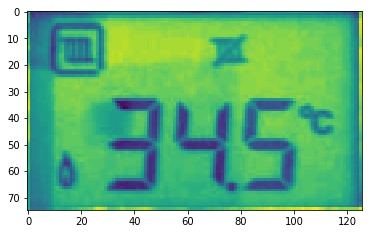

In [17]:
for cnt in squareCnts:
    warped = four_point_transform(gray, cnt.reshape(4, 2))
    output = four_point_transform(img, cnt.reshape(4, 2))
    plt.imshow(warped)

In [18]:
# extract the thermostat display, apply a perspective transform
# to it
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(img, displayCnt.reshape(4, 2))

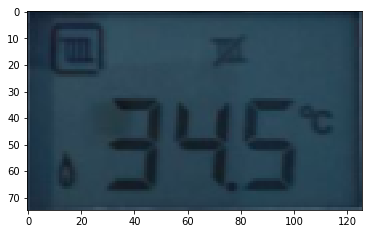

In [19]:
plt.imshow(output)

In [20]:
# threshold the warped image, then apply a series of morphological
# operations to cleanup the thresholded image
thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

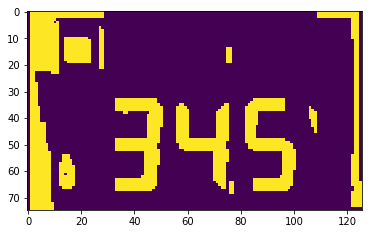

In [21]:
plt.imshow(thresh)

In [73]:
cv2.imshow('thresh', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# find contours in the thresholded image, then initialize the
# digit contours lists

lol = thresh.copy()

cnts = cv2.findContours(lol, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
digitCnts = []
 
# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
 
    # if the contour is sufficiently large, it must be a digit
    if w >= 15 and (h >= 30 and h <= 40):
        digitCnts.append(c)
        
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(lol, (x, y), (x+w, y+h), (0, 255, 0), 1)
        
cv2.imshow("Сontours", lol)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [65]:
len(digitCnts)

3

In [25]:
# sort the contours from left-to-right, then initialize the
# actual digits themselves
digitCnts = contours.sort_contours(digitCnts, method="left-to-right")[0]
digits = []

# loop over each of the digits
for c in digitCnts:
    # extract the digit ROI
    (x, y, w, h) = cv2.boundingRect(c)
    roi = thresh[y:y + h, x:x + w]
    
    # compute the width and height of each of the 7 segments
    # we are going to examine
    (roiH, roiW) = roi.shape
    (dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
    dHC = int(roiH * 0.05)
    
    # define the set of 7 segments
    segments = [
        ((0, 0), (w, dH)), # top
        ((0, 0), (dW, h // 2)), # top-left
        ((w - dW, 0), (w, h // 2)), # top-right
        ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
        ((0, h // 2), (dW, h)),	# bottom-left
        ((w - dW, h // 2), (w, h)), # bottom-right
        ((0, h - dH), (w, h)) # bottom
    ]
    
    on = [0] * len(segments)
    
    # loop over the segments
    for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
        # extract the segment ROI, count the total number of
        # thresholded pixels in the segment, and then compute
        # the area of the segment
        segROI = roi[yA:yB, xA:xB]
        total = cv2.countNonZero(segROI)
        area = (xB - xA) * (yB - yA)
    
        # if the total number of non-zero pixels is greater than
        # 50% of the area, mark the segment as "on"
        if total / float(area) > 0.5:
            on[i]= 1
            
        try:
            # lookup the digit and draw it on the image
            digit = DIGITS_LOOKUP[tuple(on)]
            digits.append(digit)
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
            cv2.putText(output, str(digit), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
        except:
            continue

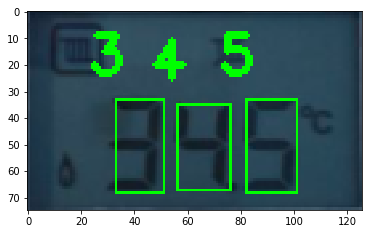

In [26]:
plt.imshow(output)

In [27]:
# display the digits
cv2.imshow("Input", img)
cv2.imshow("Output", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Videos

In [5]:
cap = cv2.VideoCapture('test video.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',frame)
    if cv2.waitKey(0) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:331: error: (-215) size.width>0 && size.height>0 in function cv::imshow
